<a href="https://colab.research.google.com/github/evelynnathaly89-cloud/ProyectoFinal_UCG/blob/main/ProyectoFinal_Evelyn_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
    <h1><b>Universidad Casa Grande</b></h1>
    <h3>Maestría en Inteligencia Artificial y Ciencia de Datos</h3>
    <p><strong>Autor:</strong> Evelyn Gonzalez</p>
</div>
<div style="text-align: center;">
    <h3>Proyecto Final</h3>
</div>

>



# **Parte 1: Selección, Exploración y Limpieza de Datos**
# **Pipeline de Análisis y Modelado en un Notebook**




## **1.1. Selección y Justificación:**

### **Objetivo General:**


---

El obejtivo de mi proyecto es predecir si un cliente abandonará el servicio, utilizando la variable binaria Churn.

Se trata de un dataset manejable, ideal para aplicar los algoritmos de Machine Learning que hemos visto.

Contiene tanto variables categóricas como numéricas, lo que permite practicar preprocesamiento y modelado supervisado.

### **Dataset:**


---

Utilizaremos el dataset que contiene información de clientes de una compañía de telecomunicaciones. **Telcom Customer Churn Dataset**, que cumple con los requisitos definidos.


*   Se encuente en Kaggle link https://www.kaggle.com/datasets/mosapabdelghany/telcom-customer-churn-dataset/data
*   El dataset se presenta en formato CSV
*   Su Tamaño es de 0.98 MB menor a los 50 MB
*   El objetivo es predecir si un cliente abandonará el servicio o no.

### **Código y Explicación:**
#### **Instalacion de dependencias:**






#### **Saving kaggle.json Api Token in colab**


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
#Cambiar al directory  de trabajo
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/src"

#### **Muestra los Dataset de Kaggle**

In [ ]:
!kaggle datasets list


ref                                                                    title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                                    Chocolate Sales                                         468320  2026-01-04 14:23:35.490000              0         84  1.0              
neurocipher/heartdisease                                               Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        369  1.0              
rockyt07/social-media-user-analysis                                    Social Media User Analysis                           247842357  2026-01-14 02:28:41.970000           

## **1.2. Carga e Inspección Inicial:**
#### **Descargar el dataset desde Kaggle**


In [ ]:

!kaggle datasets download -d mosapabdelghany/telcom-customer-churn-dataset -q


Dataset URL: https://www.kaggle.com/datasets/mosapabdelghany/telcom-customer-churn-dataset
License(s): CC-BY-NC-SA-4.0


#### **Descomprimir el archivo ZIP**


In [ ]:

import zipfile
with zipfile.ZipFile("telcom-customer-churn-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/data")


 #### **Cargar el CSV en un DataFrame de Pandas**



In [ ]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/data/Telco_Cusomer_Churn.csv")

# Revisar primeras filas
print("=== Revisión de las primeras filas ===")
df.head()


=== Revisión de las primeras filas ===


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

#Información general del DataFrame
print("=== Información del DataFrame ===")
df.info()


=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [ ]:

#Información estadísticas
print("\n=== Estadísticas de columnas categóricas ===")
print(df.describe(include=['object']))



=== Estadísticas de columnas categóricas ===
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No      

## **1.3. Limpieza de Datos:**


In [ ]:
# Ver valores faltantes x columna
print("Valores faltantes por columna:\n", df.isna().sum())

Valores faltantes por columna:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Convertir a numérico dado que en info nos dio el tipo "object"
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Eliminar filas con TotalCharges nulo
df.dropna(subset=['TotalCharges'], inplace=True)


In [ ]:

# Revisar de NaN
print("Valores faltantes en TotalCharges:", df['TotalCharges'].isna().sum())

Valores faltantes en TotalCharges: 0


## **1.4. Análisis Exploratorio de Datos (EDA):**

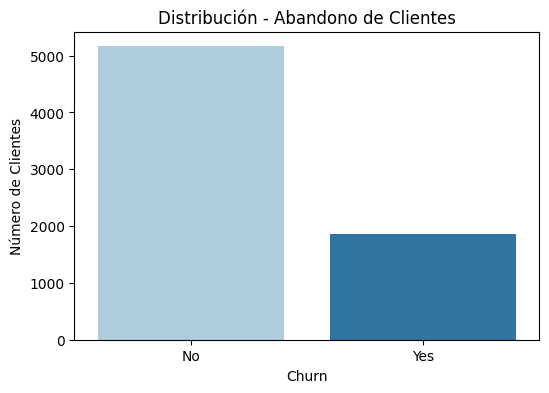

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Matplotlib o Seaborn
# Conteo de clientes que abandonaron vs que permanecen
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Paired', dodge=False)
plt.title('Distribución - Abandono de Clientes')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()



###**Análisis del histograma churn**

*   Distribución del número de clientes agrupados por género "Female" y "Male"
*   Colores separados por churn "Yes" y "No"
*   Eje Y: número de clientes por cada barra (por género y churn)


####**Conclusión**

Con esta grafica **Histograma** nos confirma que el género no es un factor relevante para predecir el abandono, la mayoría de clientes de ambos géneros mantiene el servicio

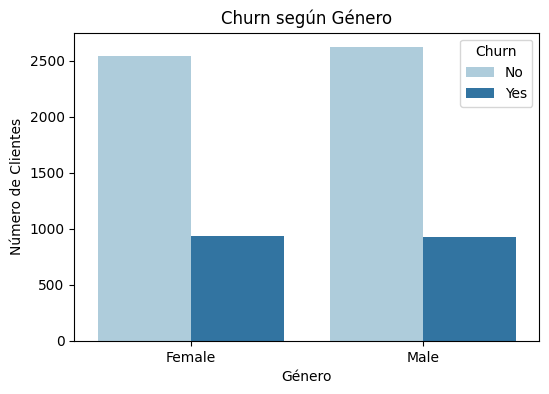

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Paired')
plt.title('Churn según Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()


###**Análisis del histograma churn según género**

*   Distribución del número de clientes agrupados por género "Female" y "Male"
*   Colores separados por churn "Yes" y "No"
*   Eje Y: número de clientes por cada barra (por género y churn)


####**Conclusión**

Con esta grafica **Histograma** nos confirma que el género no es un factor relevante para predecir el abandono, la mayoría de clientes de ambos géneros mantiene el servicio

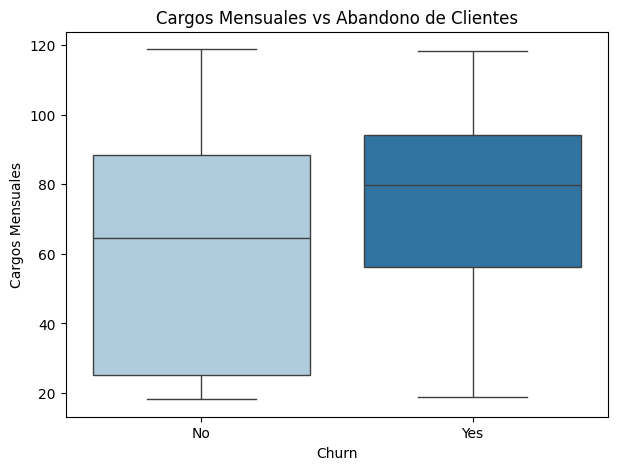

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    palette='Paired',
    legend=False
)
plt.title('Cargos Mensuales vs Abandono de Clientes')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales')
plt.show()


###**Análisis de la gráfica boxplot**

*   Los clientes que abandonan pagan MÁS
*   Cargos bajos lo consideremos clientes más estables
*   Cargos altos son los clientes con más riesgo de churn

####**Conclusión**

Con esta grafica **boxplot** podemos concluir que los clientes que abandonan el servicio tienen un cargo mensual significativamente mayor, lo que nos sugiere que el valor de pago mensual es un valor relevante en el abandono del servicio.


# **Parte 2: Aplicando Programación Orientada a Objetos (POO) para el Pipeline**


## **2.1. Programación Orientada a Objetos (POO): Creación de una Clase para un Modelo Predictivo**

### **Descripción:**
Encapsularás el flujo de trabajo en una clase para crear código modular.  
Esta clase incluirá métodos los métodos preprocess, train, y evaluate para ejecutar todo el flujo de trabajo.

### **Dataset:**
Usaremos el dataset **"data/Telco_Cusomer_Churn.csv"**, disponible en `Kaggle`.

### **Código y Explicación:**

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# División de datos
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.linear_model import LinearRegression,LogisticRegression

# Métrica de evaluación
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score


In [ ]:

#Definición de una clase llamada DataPipeline.

class DataPipeline:
    def __init__(self):
        #El constructor debe inicializar atributos como el modelo (self.model = None
        self.model = None

    def preprocess(self, df):
        """
        Aplica preprocesamiento al DataFrame:

        - Feature engineering con apply y lambda
        - Manejo de variables categóricas
        - Separación de features (X) y target (y) para el modelo

        Parámetros:
        df (pd.DataFrame): Dataset original.

        Retorna:
        X (pd.DataFrame): Variables predictoras procesadas.
        y (pd.Series): Variable objetivo.

        """
        # lógica de limpieza, feature engineering y codificación.

        df = df.copy()

        df['TotalCharges'] = df['TotalCharges'].replace(" ", pd.NA)
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        # Eliminar filas con TotalCharges nulo
        df.dropna(subset=['TotalCharges'], inplace=True)


        # Crear una nueva columna binaria a partir de Contract
        df['is_monthly_contract'] = df['Contract'].apply(
            lambda x: 1 if x == 'Month-to-month' else 0
        )

        # ---------- Variable objetivo ----------
        y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

        # ---------- Eliminar columnas innecesarias ----------
        X = df.drop(columns=['Churn', 'customerID'])

        # ---------- Variables categóricas ----------
        X = pd.get_dummies(X, drop_first=True)

        return X, y

    def train(self, X, y, model_instance):
        """
        Divide los datos y entrena el modelo
        """

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        self.model = model_instance
        self.model.fit(X_train, y_train)

        print("✅ Modelo entrenado correctamente.")

        self.X_test = X_test
        self.y_test = y_test

    def evaluate(self, X=None, y=None):
        """
        Evaluación del modelo con métricas de clasificación
        """

        if X is None or y is None:
            X = self.X_test
            y = self.y_test

        predictions = self.model.predict(X)

        accuracy = accuracy_score(y, predictions)
        f1 = f1_score(y, predictions)

        print("📊 Métricas de Evaluación")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"F1-score: {f1:.2f}")

        return accuracy, f1


In [ ]:
# Crear instancia del pipeline
pipeline = DataPipeline()

# Preprocesamiento
X, y = pipeline.preprocess(df)

# Crear modelo de Scikit-learn
model = LogisticRegression(max_iter=5000)

# Entrenamiento
pipeline.train(X, y, model)

# Evaluación
pipeline.evaluate(pipeline.X_test, pipeline.y_test)


✅ Modelo entrenado correctamente.
📊 Métricas de Evaluación
Accuracy: 0.81
F1-score: 0.61


(0.8059701492537313, 0.6138613861386139)

# **Parte 3: Calidad y Reproducibilidad del Software**

### Las pruebas unitarias se ejecutaron correctamente, validando la función auxiliar utilizada durante el preprocesamiento de datos.

In [ ]:
%%writefile "/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/test/mi_pipeline_utils.py"
def is_monthly_contract(contract_type):
    """
    Devuelve 1 si el contrato es mensual, 0 en caso contrario.
    """
    return 1 if contract_type == "Month-to-month" else 0


Writing /content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/mi_pipeline_utils.py


In [ ]:
%%writefile "/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/test/mi_pipeline_utils.py"
from mi_pipeline_utils import is_monthly_contract

def test_is_monthly_contract_month_to_month():
    assert is_monthly_contract("Month-to-month") == 1

def test_is_monthly_contract_one_year():
    assert is_monthly_contract("One year") == 0


Overwriting /content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/mi_pipeline_utils.py


### **3.1. Gestión de Dependencias**

A continuación se genera el archivo `requirements.txt`, el cual permite
reproducir el entorno del proyecto instalando exactamente las mismas
librerías utilizadas durante el desarrollo.

In [ ]:
!pip install pytest -q
!pytest


============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0
rootdir: /content
plugins: langsmith-0.6.4, typeguard-4.4.4, anyio-4.12.1
collected 2 items                                                              

test_mi_pipeline.py ..                                                   [100%]

============================== 2 passed in 0.06s ===============================


In [ ]:
!pip freeze > "/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/requirements.txt"
!cat "/content/drive/MyDrive/Colab Notebooks/ProyectoFinal_UCG/requirements.txt"


absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.1
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.1.12.0.42.13
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.31.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2026.1.4
c


## **3.1. Conclusión del Proyecto:**

En este proyecto se desarrolló un pipeline de datos utilizando buenas prácticas de ingeniería de software.

Se utilizó Regresión Logística debido a que el problema es de clasificación binaria "Churn: Yes/No". Este modelo es interpretable, eficiente y adecuado como línea base para problemas de predicción de abandono de clientes.

Se encapsuló el flujo completo de preprocesamiento, entrenamiento y evaluación dentro de la clase `DataPipeline`. Se realizó ingeniería de características utilizando funciones lambda y se gestionaron variables categóricas mediante one-hot encoding. El modelo de regresión logística obtuvo una accuracy del 81 % y un F1-score de 0.61, lo que indica un desempeño adecuado en la predicción de churn.

Además, se implementó testing unitario utilizando pytest para validar funciones auxiliares del preprocesamiento,
se documentó el código mediante docstrings y se gestionaron las dependencias del proyecto con un archivo `requirements.txt`.

Como posibles pasos futuros, se podrían probar modelos más complejos, aplicar técnicas de balanceo de clases
o realizar validación cruzada para mejorar el rendimiento del modelo.


